## BLM19412E - Introduction to Data Mining Final Project


---------
### Names, Surnames, StudentIDs: Mahmud Bera Karagöz 2021221029, Zeynep Nursena Kütük 2021221012, Osman Talha Üzmez 2021221035
---------

### Part 1. Exploratory data analysis (EDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "8"

In [ ]:
fileDir ='train.csv'
read_data = pd.read_csv(fileDir)

data = read_data.copy()

In [3]:
data.shape

(103904, 25)

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [8]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
pd.Series(data.dtypes).value_counts()

int64      17
object      5
float64     1
Name: count, dtype: int64

In [12]:
data.select_dtypes(exclude="number").head(5)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


The dataframe without number features of dataset

In [13]:
data.Class.nunique()

3

number of unique values in the 'Class' column of the 'data' dataset.

In [14]:
data.Class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [15]:
data.values

array([['Male', 'Loyal Customer', 13, ..., 25, 18.0,
        'neutral or dissatisfied'],
       ['Male', 'disloyal Customer', 25, ..., 1, 6.0,
        'neutral or dissatisfied'],
       ['Female', 'Loyal Customer', 26, ..., 0, 0.0, 'satisfied'],
       ...,
       ['Male', 'disloyal Customer', 30, ..., 7, 14.0,
        'neutral or dissatisfied'],
       ['Female', 'disloyal Customer', 22, ..., 0, 0.0,
        'neutral or dissatisfied'],
       ['Male', 'Loyal Customer', 27, ..., 0, 0.0,
        'neutral or dissatisfied']], dtype=object)

array containing all the values in the 'data' dataset, including both the index and column labels.

In [16]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [17]:
#For not number values
data.describe(exclude="number").head(5)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


a summary of the non-numeric (categorical) columns in the dataset. It includes counts, unique values, the most frequent value, and the frequency of the most frequent value for each categorical column.

In [18]:
np.sum(data.Class == "Eco")

np.int64(46745)

In [19]:
uniqueVal = data.select_dtypes(include="number").nunique().sort_values()
print(uniqueVal)

Baggage handling                        5
Departure/Arrival time convenient       6
Gate location                           6
Inflight wifi service                   6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Ease of Online booking                  6
Leg room service                        6
Checkin service                         6
On-board service                        6
Inflight entertainment                  6
Inflight service                        6
Cleanliness                             6
Age                                    75
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
Flight Distance                      3802
dtype: int64


selects the numerical columns from the dataset and calculates the number of unique values for each numerical column. It then sorts these unique value counts in ascending order

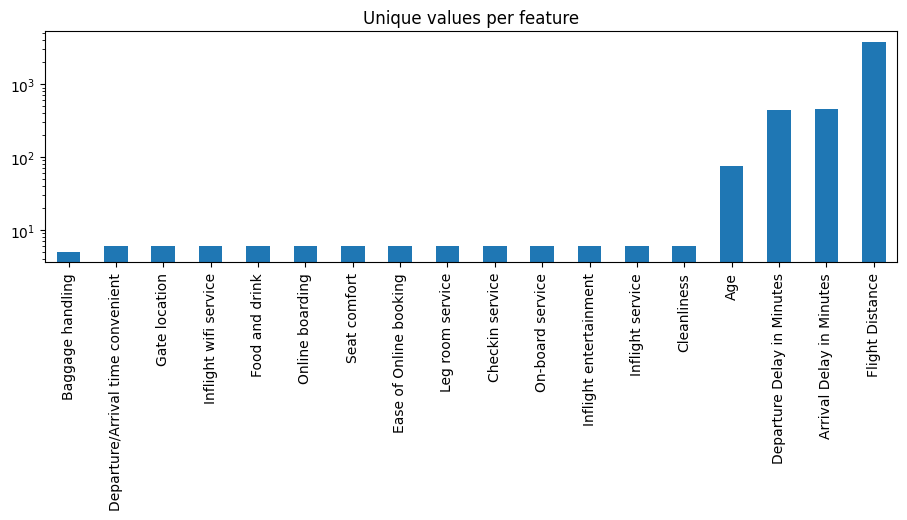

In [20]:
uniqueVal.plot.bar(logy=True, figsize=(11, 3), title="Unique values per feature");

### Part 2. Visual analysis of the features

Text(0.5, 1.0, 'Distribution of Age')

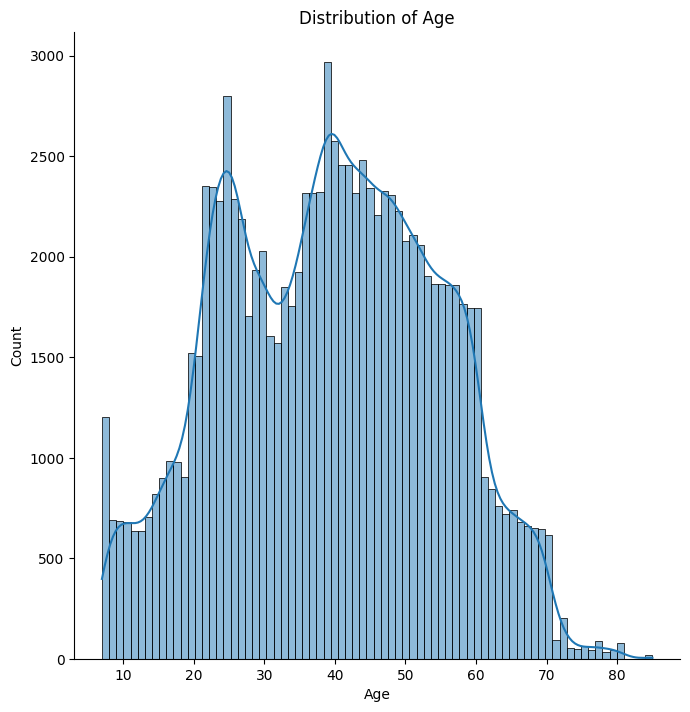

In [25]:
sns.displot(data = data['Age'], kde=True, height = 7)
plt.title('Distribution of Age')

There is not much childrens here. There is a noticeable increasing in count when we come to age 25. From age 58 we notice that the count come low. That means we are working in youth people in age between (25 - 60).

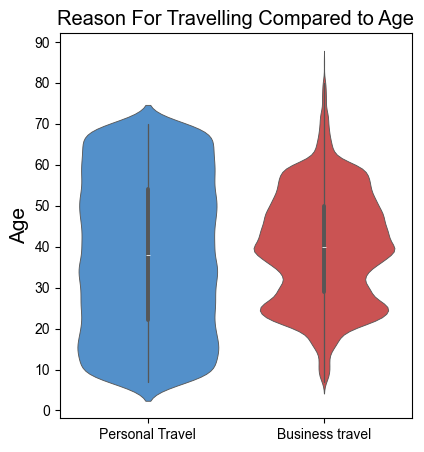

In [26]:
plt.figure(figsize=(10,5),dpi=100)


plt.subplot(1,2,1)

plt.style.use('bmh')
sns.set_style('ticks')



plt.title('Reason For Travelling Compared to Age')

sns.violinplot(x='Type of Travel',y='Age',hue='Type of Travel',data=data,palette=['#3F91DE','#DE3F3F'])


plt.yticks(np.arange(0,100,10))


plt.ylabel('Age',size=15)
plt.xlabel('')


plt.subplots_adjust(hspace = 0.3, wspace=0.2)

plt.show()

Number of passengers flying for personal reasons is consinstent at any age. Most passengers flying for business are between 25-60.

In [27]:
gender_satisfaction_count = data.groupby(["Gender", "satisfaction"]).size().reset_index(name="Count")

fig = px.pie(
    gender_satisfaction_count,
    values="Count",
    names="satisfaction",
    title="Satisfaction Distribution by Gender",
    color="satisfaction",
    color_discrete_sequence=['#98F5FF', '#193EB0'],  # Define custom colors
    facet_col="Gender",
)

fig.update_traces(textinfo='percent+label', pull=[0.03,0])

fig.show()

Overall, the data suggests a relatively balanced satisfaction distribution between genders, with a slightly higher proportion of satisfied individuals across both male and female groups.

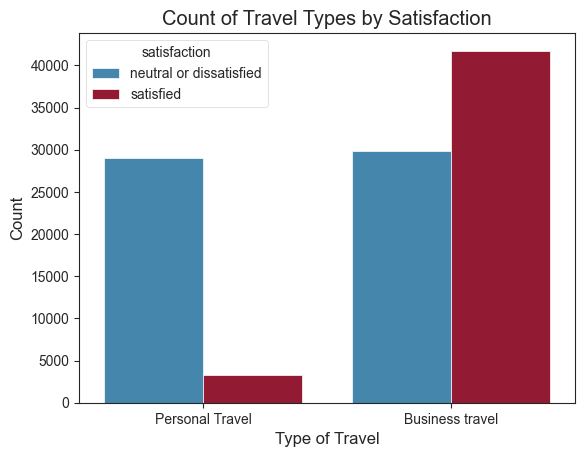

In [28]:
g = sns.countplot(x="Type of Travel", hue="satisfaction", data=data)
g.set_ylabel("Count")
g.set_title("Count of Travel Types by Satisfaction")
plt.show()

Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.

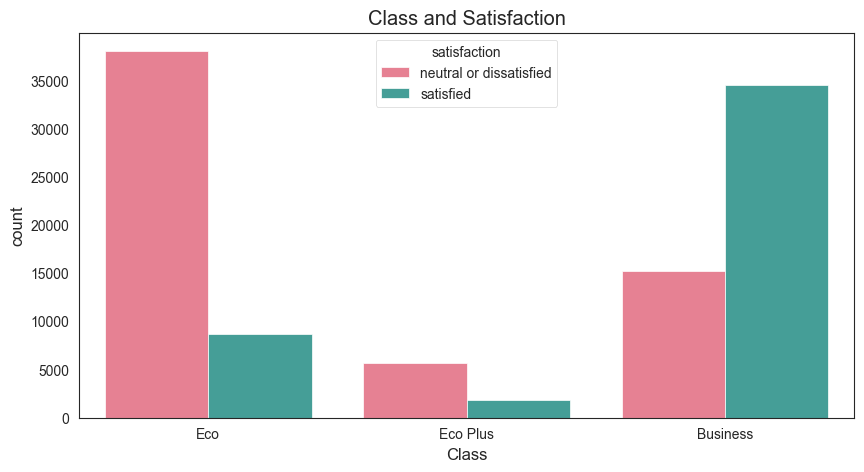

In [29]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 5))  # Tek sütunlu bir subplot oluşturuldu

sns.countplot(x='Class', data=data, hue='satisfaction', order=['Eco', 'Eco Plus', 'Business'], palette='husl', ax=ax)
ax.set_title('Class and Satisfaction')

plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

Economy and Economy Plus tend to have more neutral or dissatisfied customers than satisfied customers, whereas Business Class has more satisfied customers than dissatisfied customers. Notably, Economy Plus has the lowest count, therefore, there is an unequal distribution in the class of customers in the dataset

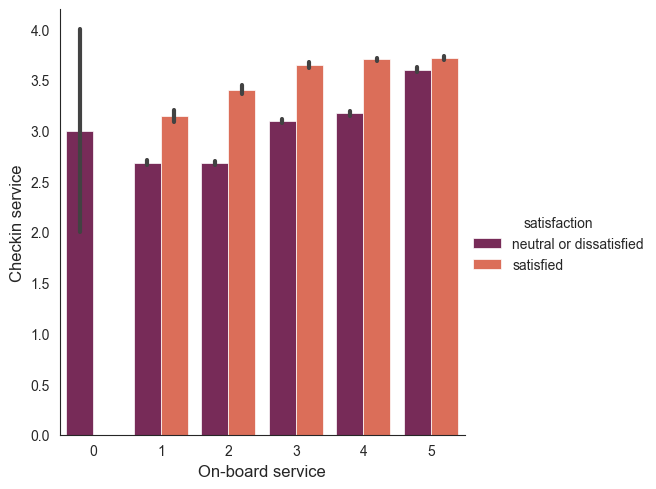

In [30]:
sns.catplot(x='On-board service',y='Checkin service',hue='satisfaction',data=data,kind='bar',palette='rocket')

As we can see while the rating increases in on-board service the checkin service increases and people will be satisfied

Text(0.5, 1.0, 'Ease of Online booking and Classes')

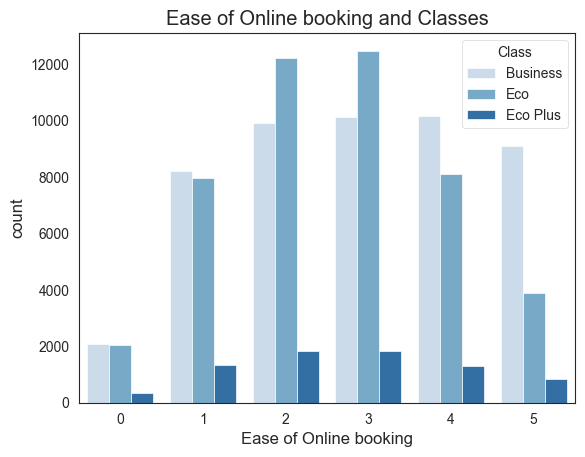

In [31]:
sns.countplot(data=data,x='Ease of Online booking',hue='Class',palette='Blues')
plt.title("Ease of Online booking and Classes")

As we can see it is easy to book online the ECO class and business
It is hard for ECO plus

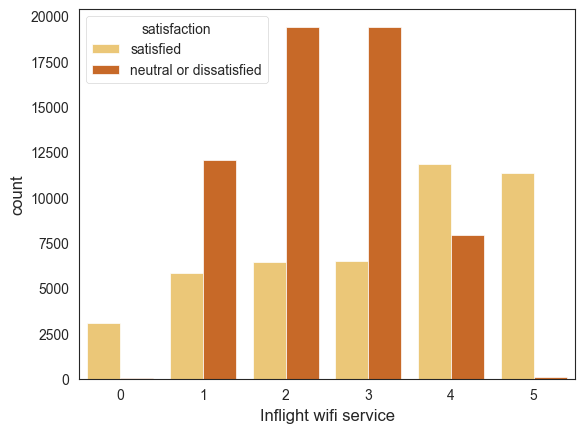

In [32]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

Based on this chart, it's evident that nearly every traveler who rated the Wi-Fi service with a perfect score of 5 out of 5 points expressed satisfaction with the flight.

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

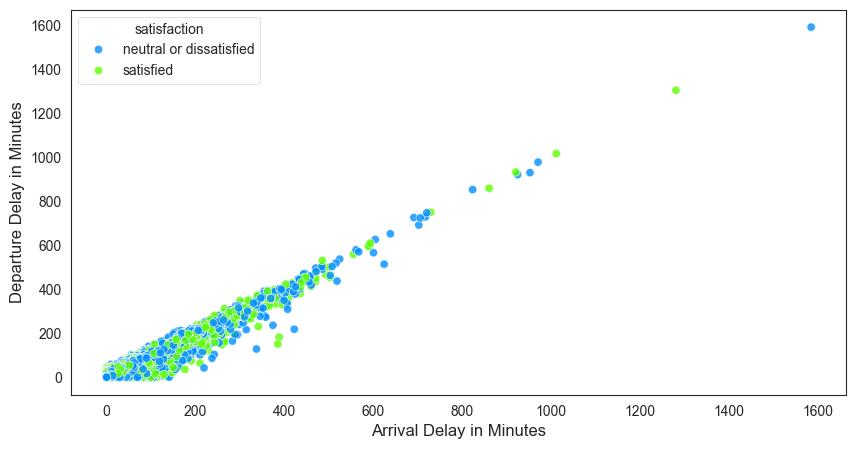

In [33]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=data,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

The connection between arrival and departure lateness seems to follow a linear pattern. Moreover, it's worth noting that one customer expressed satisfaction despite experiencing a 1300-minute delay

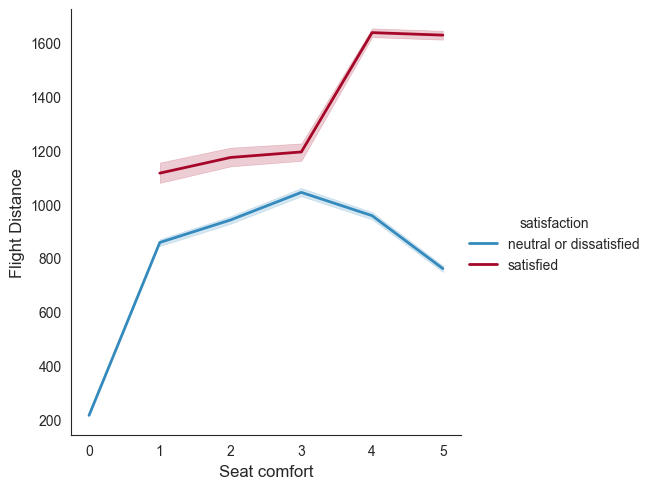

In [34]:
sns.relplot(data=data,x='Seat comfort',y='Flight Distance',hue='satisfaction',kind='line')

Satisfied people have more long-distance flight than the dissatisfied.

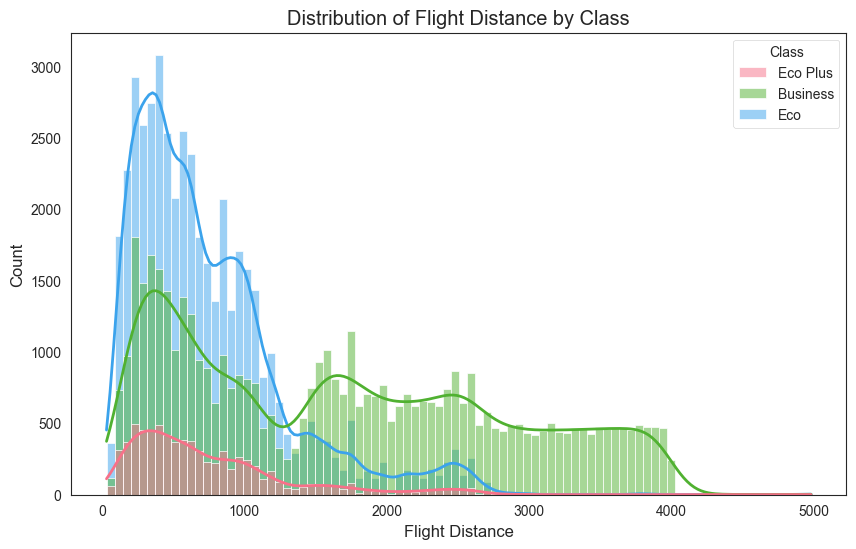

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) 

sns.histplot(x='Flight Distance', data=data, hue='Class', kde=True, palette='husl')
plt.title('Distribution of Flight Distance by Class') 

plt.show()

We can also see that as flight distance increases, more people take Business class than Economy or Economy Plus. However, for short distances, particularly those under 1000 miles, Economy class is by far the most popular choice. Economy Plus is consistently the least popular choice among the flight classes.

### Part 4. Data pre-processing


In [36]:
def outlierThresholdsIQR(data, colName, q1=0.25, q3=0.75):
    Q1 = data[colName].quantile(q1)
    Q3 = data[colName].quantile(q3)
    IQR = Q3 - Q1
    upperBoundary = Q3 + 1.5 * IQR
    lowerBoundary = Q1 - 1.5 * IQR
    return lowerBoundary, upperBoundary

 calculates the lower and upper boundaries for detecting outliers using the Interquartile Range (IQR) method

In [37]:
def checkOutlierIQR(data):
    outlier_columns = [] 
    for colName in data.columns:
        if pd.api.types.is_numeric_dtype(data[colName]): 
            lowerBoundary, upperBoundary = outlierThresholdsIQR(data, colName)
            if data[(data[colName] > upperBoundary) | (data[colName] < lowerBoundary)].any(axis=1).astype(int).sum():
                outlier_columns.append(colName)  
    return outlier_columns


examines each numeric column in the dataset, calculates outlier thresholds using the IQR method, and identifies columns where outliers are present. It provides a convenient way to detect outliers across multiple columns in a dataset.

In [38]:
outlier_columns = checkOutlierIQR(data)
print("Column which has outliers:", outlier_columns)

Column which has outliers: ['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [39]:
def removeOutlierIQR(data, colName):
    lowerBoundary, upperBoundary = outlierThresholdsIQR(data, colName)
    withoutOutliers = data[~((data[colName] < lowerBoundary) | (data[colName] > upperBoundary))]
    return withoutOutliers

provides a straightforward way to remove outliers from a specific column in a dataset using the IQR method. 

In [40]:
removeOutlierIQR(data, "Flight Distance").shape

(101613, 23)

In [41]:
removeOutlierIQR(data, "Checkin service").shape

(91013, 23)

In [42]:
removeOutlierIQR(data, "Departure Delay in Minutes").shape

(89375, 23)

In [43]:
removeOutlierIQR(data, "Arrival Delay in Minutes").shape

(89950, 23)

In [44]:
dataWithoutOutliers=data.copy()

In [45]:
diaNumCols=data.select_dtypes(include=np.number).columns
for numFeature in diaNumCols:
    dataWithoutOutliers =  removeOutlierIQR(dataWithoutOutliers, numFeature)

a loop that iterates over each numeric column in the dataset, selects those columns, and then applies the 'removeOutlierIQR' function to remove outliers from each selected numeric column using the Interquartile Range (IQR) method.

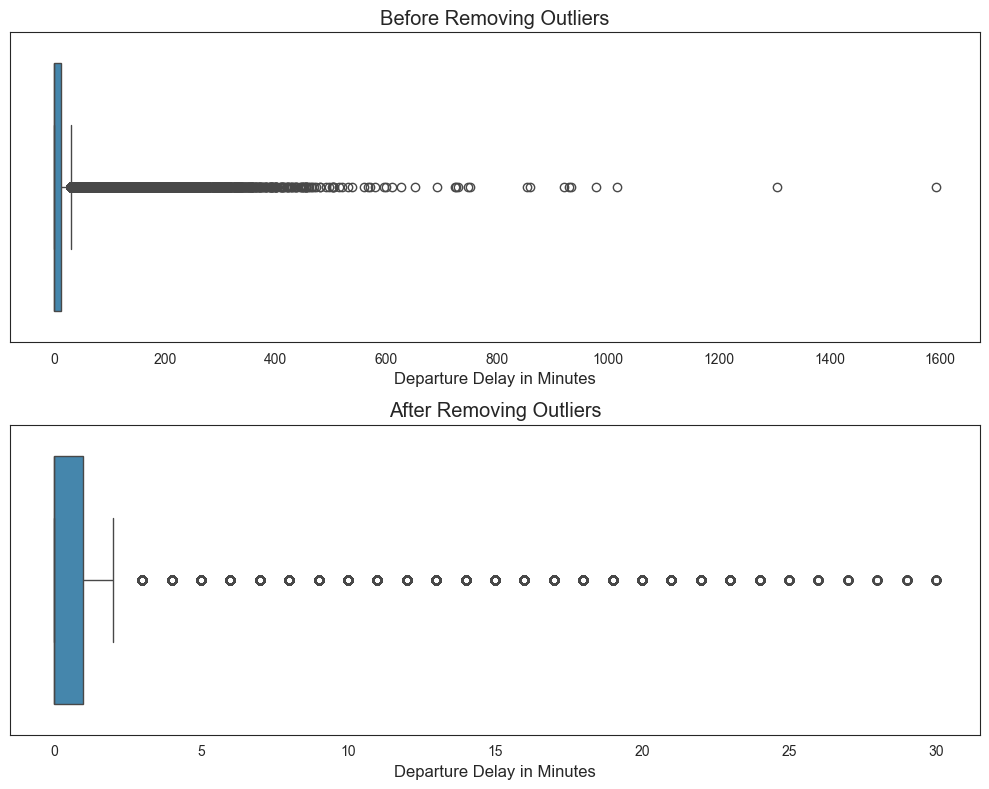

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.boxplot(data=data, x='Departure Delay in Minutes', ax=axes[0])
axes[0].set_title('Before Removing Outliers') 
sns.boxplot(data=dataWithoutOutliers, x='Departure Delay in Minutes', ax=axes[1])
axes[1].set_title('After Removing Outliers')  

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'After Removing Outliers')

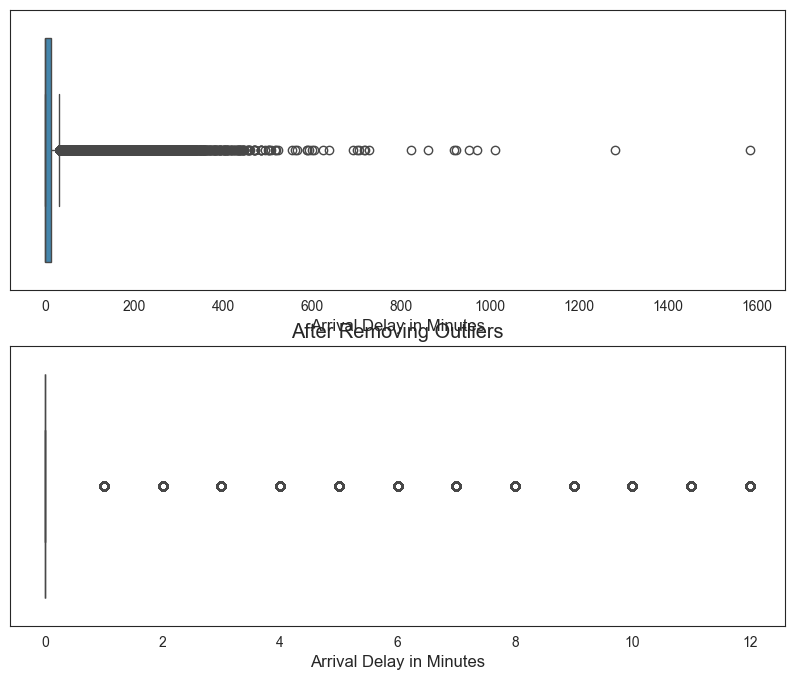

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=data, x='Arrival Delay in Minutes' ,ax=axes[0])  
plt.title('Before Removing Outliers') 

plt.subplot(2, 1, 2)  
sns.boxplot(data=dataWithoutOutliers, x='Arrival Delay in Minutes', ax=axes[1])  
plt.title('After Removing Outliers')  

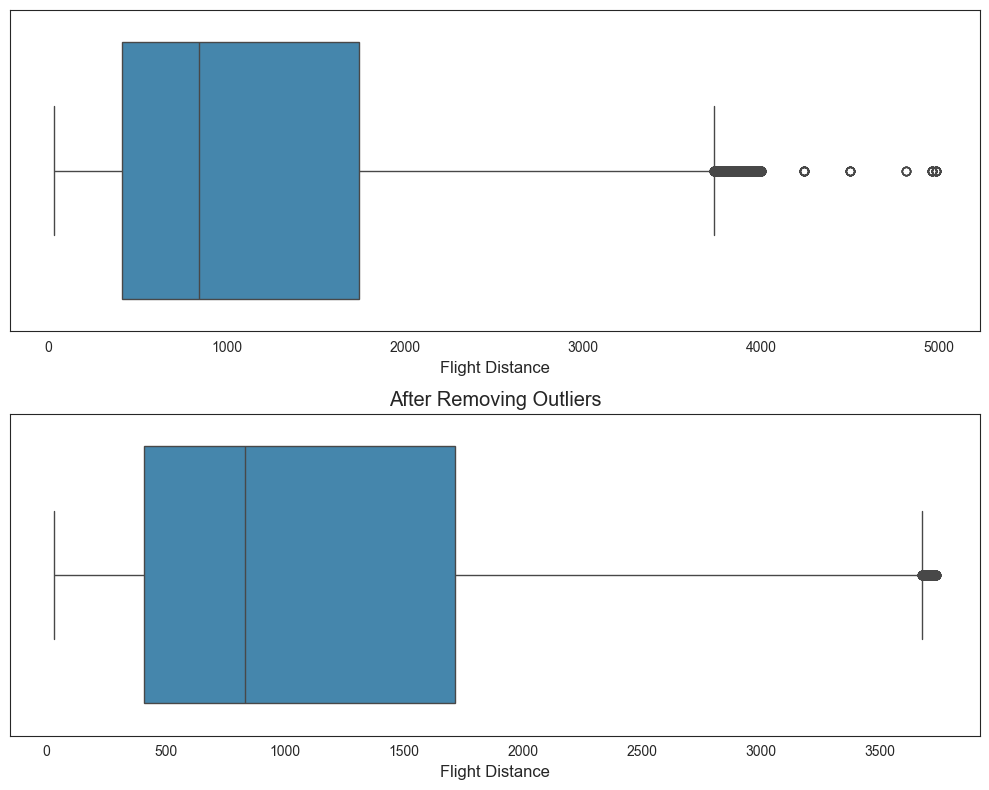

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=data, x='Flight Distance',ax=axes[0])  
plt.title('Before Removing Outliers') 

plt.subplot(2, 1, 2)  
sns.boxplot(data=dataWithoutOutliers, x='Flight Distance', ax=axes[1])  
plt.title('After Removing Outliers')  

plt.tight_layout() 
plt.show()

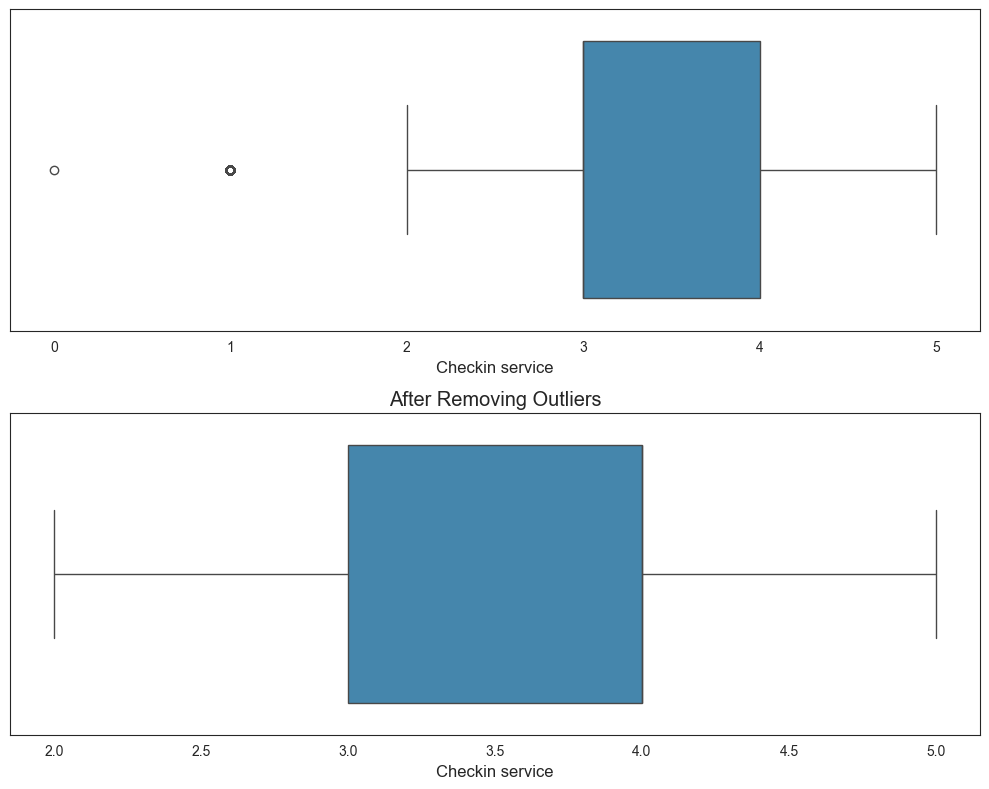

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=data, x='Checkin service',ax=axes[0])  
plt.title('Before Removing Outliers') 

plt.subplot(2, 1, 2)  
sns.boxplot(data=dataWithoutOutliers, x='Checkin service', ax=axes[1])  
plt.title('After Removing Outliers')  

plt.tight_layout() 
plt.show()

In [50]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [51]:
sampleairlinewithInterpolation=data
missingPercentages = sampleairlinewithInterpolation.isna().sum().sort_values(
    ascending = False)/len(sampleairlinewithInterpolation)*100

# Filter: sort out the ones with zeroes
missingPercentages[missingPercentages != 0]

Arrival Delay in Minutes    0.298352
dtype: float64

In [52]:
sampleairlinewithInterpolation['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].interpolate(method ='linear', limit_direction ='forward')

In [53]:
missPercent = sampleairlinewithInterpolation.isna().sum().sort_values(
    ascending = False)/len(sampleairlinewithInterpolation)
missPercent[missPercent != 0]#checking the filling process

Series([], dtype: float64)

In [54]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Part 5. Feature engineering and description 

In [55]:
nDuplicates = data.duplicated().sum()
print(f"You seem to have {nDuplicates} duplicates in your dataset.")

You seem to have 0 duplicates in your dataset.


In [56]:
data.isnull().values.any()

np.False_

In [57]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

We have categorical features so We made label encoding to convert categorical features into numerical features

In [58]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


<Axes: >

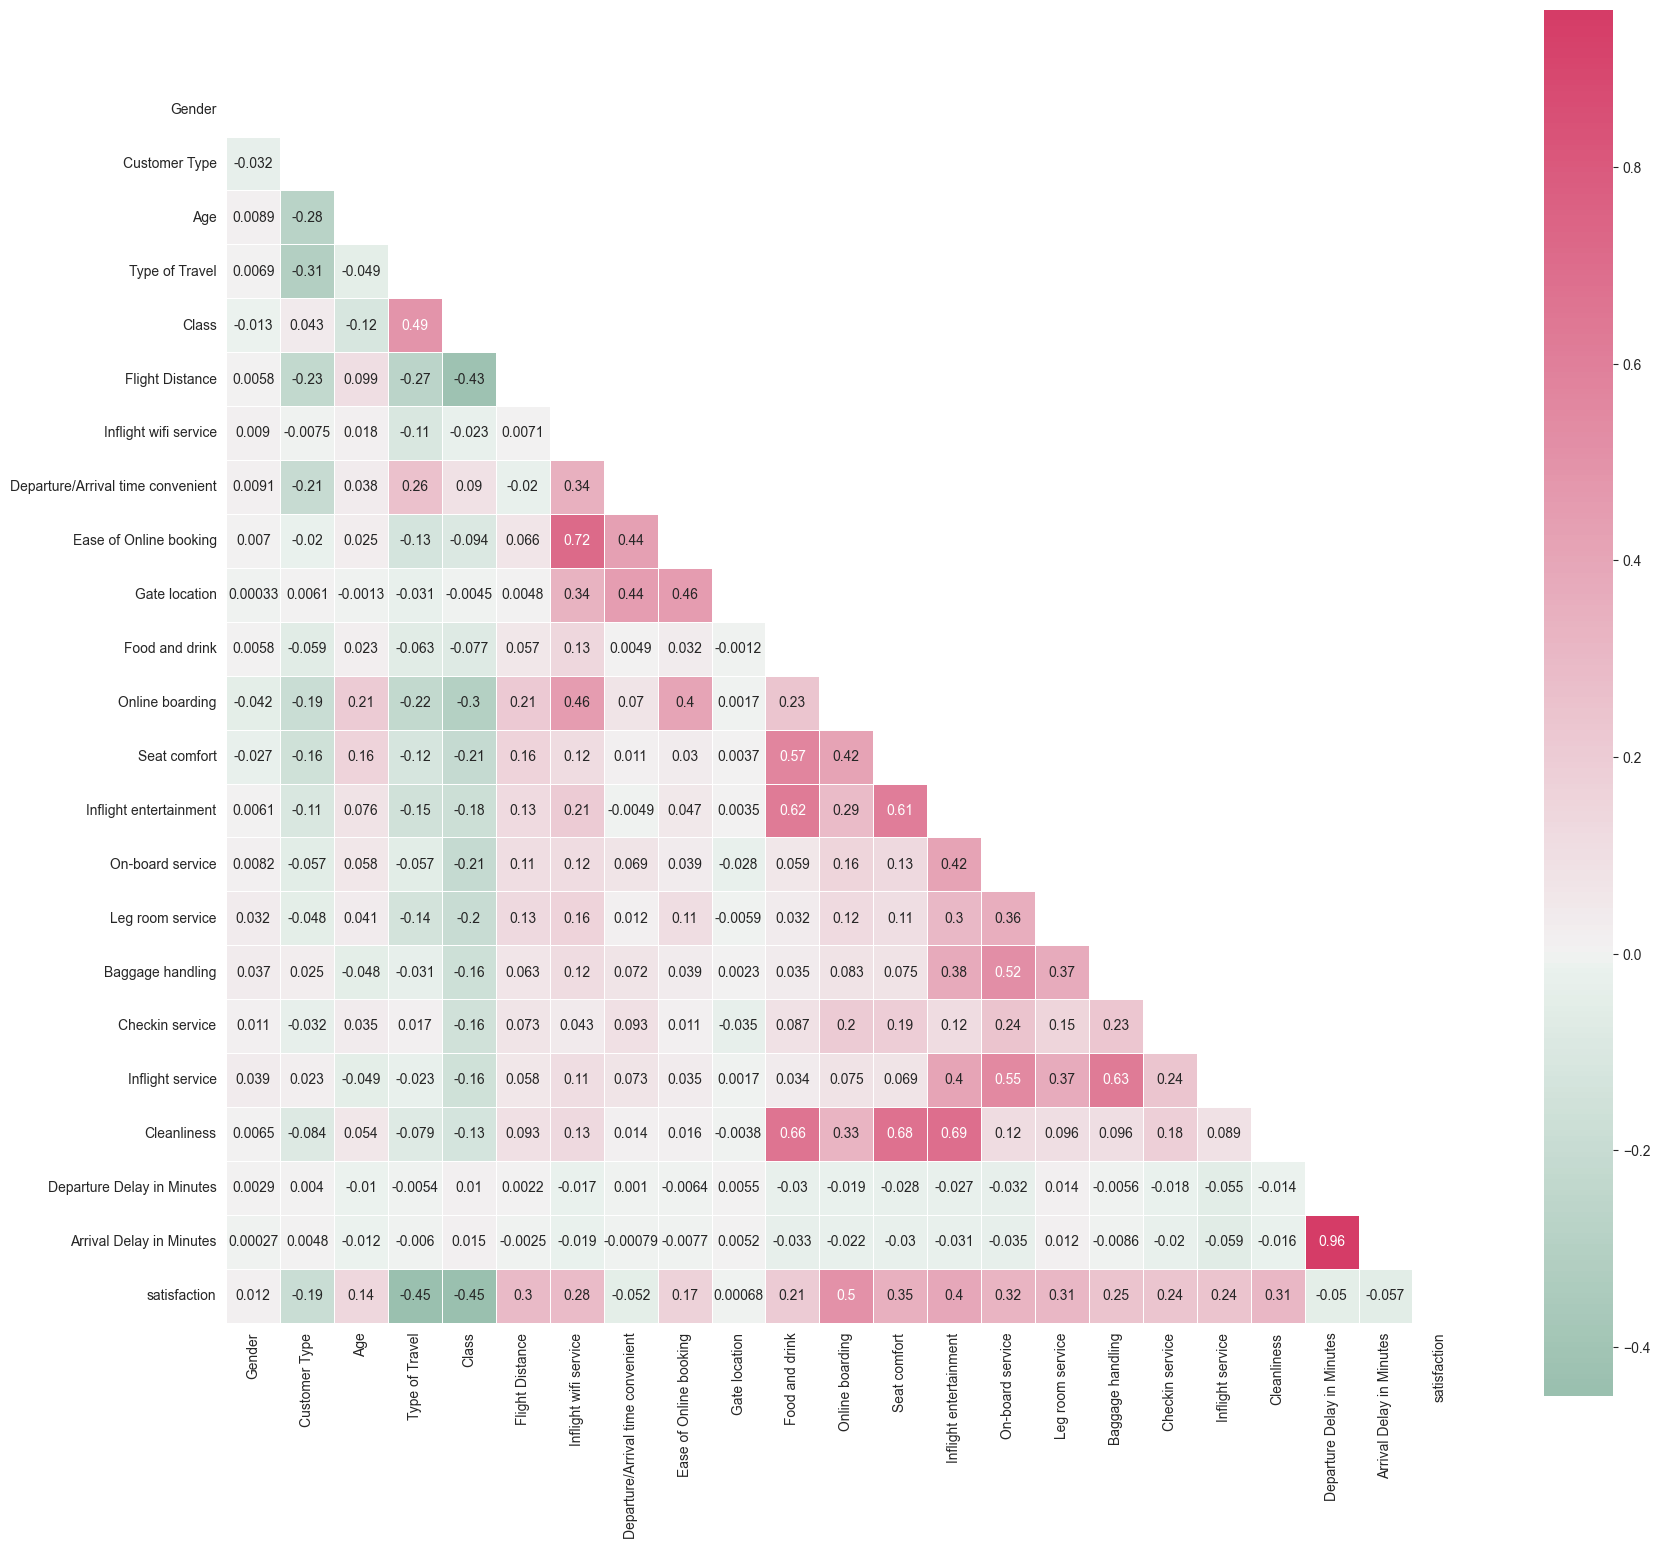

In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.

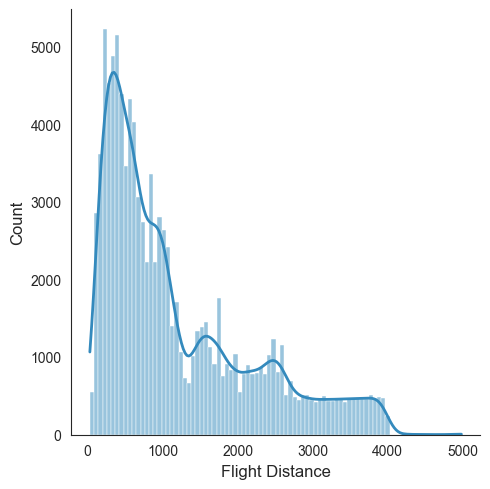

In [60]:
sns.displot(data=data, x="Flight Distance", kde=True)
plt.show()

 Flight distance is highly skewed so we used log transformer to overcome skewed.

In [61]:
def logTransform(data, xFeature):
    return (np.log10(1+ data[[xFeature]]))

Using logTransform function

In [62]:
logTransFlightDistance=logTransform(data, 'Flight Distance')
data['logTransFlightDistance'] = logTransFlightDistance
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,logTransFlightDistance
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,2.663701
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,2.372912
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,3.058046
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,2.750508
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,2.332438


<Axes: xlabel='logTransFlightDistance', ylabel='Count'>

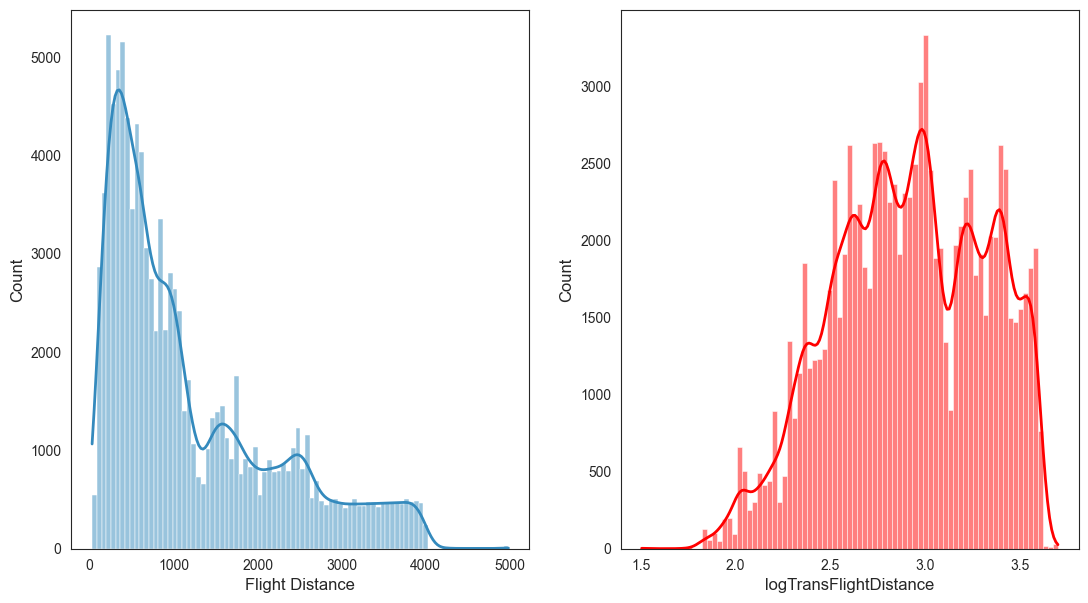

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=data, x='Flight Distance', kde=True, ax = ax[0])
sns.histplot(data=data, x='logTransFlightDistance', kde=True, color ="red", ax = ax[1])

We can see that the skewness of the distributions are maintained

In [64]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
modified_data = pd.DataFrame(r_scaler.transform(data), columns=data.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,logTransFlightDistance
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0,0.528433
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0,0.395800
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0,0.708300
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0,0.568027
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0,0.377339


We used MinMaxScaler to equalize the value ranges between different features or to compress them into a specific range.

In [65]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service'],
      dtype='object')


These are top 10 features impacting on passenger satisfaction.

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(modified_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())

[0.23258042 0.12516482 0.11935981 0.08573184]
0.3577452367854691


In [67]:
pca.components_

array([[ 1.42521678e-02, -5.85198548e-02,  4.55246833e-02,
        -4.16615785e-01, -2.73321746e-01,  1.17560645e-01,
         1.38054678e-01, -1.96575625e-02,  1.09468468e-01,
         1.74381357e-02,  1.39314787e-01,  2.34443411e-01,
         1.94588912e-01,  2.27579384e-01,  1.55078325e-01,
         1.52991202e-01,  1.50789108e-01,  9.95389319e-02,
         1.16014935e-01,  1.75247887e-01, -1.27219542e-03,
        -1.49802294e-03,  6.35359054e-01,  9.21199939e-02],
       [ 5.63296347e-01, -4.39761341e-01,  4.86140729e-02,
         5.30975008e-01,  1.07556132e-01, -3.76735183e-03,
         1.02583186e-01,  2.56421893e-01,  7.86888908e-02,
         5.80675139e-02,  1.04338763e-01,  7.20328246e-02,
         1.08380402e-01,  1.37461160e-01,  1.02678238e-01,
         6.27401585e-02,  1.17208619e-01,  8.48253006e-02,
         9.28610054e-02,  1.21590232e-01, -7.79953008e-04,
        -9.81721223e-04,  4.52644309e-02,  5.41621641e-04],
       [ 8.21203124e-01,  2.82250861e-01, -3.42344430e

In [68]:
pca.explained_variance_

array([0.48137944, 0.25905781, 0.24704299, 0.17744205])

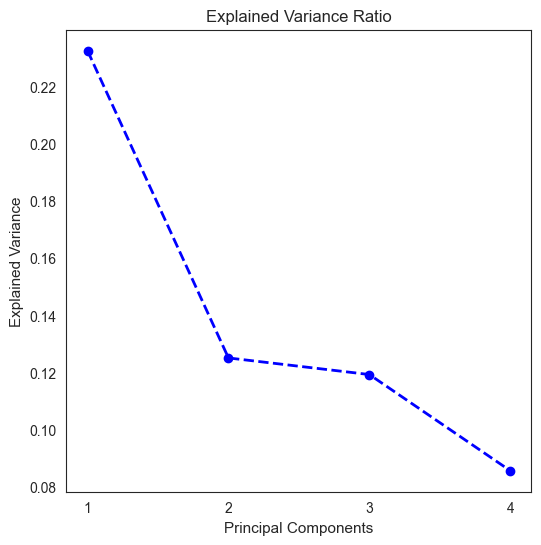

In [69]:
# Visual for each component’s explained variance
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(pca.explained_variance_ratio_,'bo--',linewidth=2)
ax.set_xlabel('Principal Components', fontsize = 11)
ax.set_ylabel('Explained Variance', fontsize = 11)
ax.set_title('Explained Variance Ratio', fontsize = 12)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

First component has the highest explained variance ratio, approximately 0.22, meaning it captures about 22% of the total variance in the dataset. It is the most significant component in terms of explaining the variability of the data.The explained variance ratio decreases for the following components, indicating they contribute less to explaining the data’s variability. The second component has a lower explained variance ratio compared to the first, and this trend continues for the third and fourth components.

### Part 6. Choose Machine Learning Algorithms & Explain

##### Logistic Regression
- Logistic Regression is a linear model used for binary classification tasks. It estimates the probability that a given input belongs to a particular class using the logistic (sigmoid) function. Despite its simplicity, it performs well when the relationship between the features and the target variable is approximately linear. We used it as a baseline model.

##### Decision Tree
- Decision Tree is a non-linear model that splits the dataset into branches based on feature thresholds, forming a tree-like structure. Each internal node represents a decision rule, and each leaf node represents a class label. Decision trees are easy to interpret and can capture complex interactions between features.

##### K-Nearest Neighbors
- KNN is a non-parametric algorithm that classifies a data point based on the majority class among its k-nearest neighbors in the feature space. It relies on distance metrics (e.g., Euclidean distance) and is sensitive to feature scaling. It works best when the data has clear clustering patterns.

##### Random Forest
- Random Forest is an ensemble method that combines multiple decision trees. Each tree is trained on a random subset of the data and features (bagging), and the final prediction is made by aggregating the votes of all trees (majority voting). This approach improves generalization and reduces overfitting compared to a single decision tree.

##### Logistic Regression with Polynomial Features
- This model extends standard logistic regression by incorporating polynomial combinations of the original features, allowing the model to capture non-linear relationships. By transforming the input space into a higher dimension, it increases the model’s capacity to fit more complex patterns.

##### Navie Bayes
- Naive Bayes is a probabilistic classifier based on Bayes’ theorem, assuming that features are conditionally independent given the class label (the “naive” assumption). Despite its simplicity, it performs surprisingly well on high-dimensional datasets, especially in text classification and spam detection tasks.

### Part 7. Cross-validation, hyperparameter tuning
Each selected algorithm was implemented, and cross-validation was performed to rigorously evaluate model performance; this technique systematically partitions the dataset into training and validation subsets, ensuring that every data point is used for both training and evaluation across different folds, thereby providing a reliable estimate of generalization ability. Subsequently, hyperparameter search spaces were defined for each model, and systematic tuning procedures were conducted to identify the optimal parameter configurations. Finally, each model was retrained using these best-found hyperparameters and evaluated based on the most robust performance metrics to ensure optimal predictive accuracy.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [71]:
X_new.shape

(103904, 10)

In [72]:
print(X.columns[selector.get_support(indices=True)])

# Eğitim ve test veri setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service'],
      dtype='object')


In [73]:
model_logisticReg = LogisticRegression()
model_logisticReg.fit(X_train, y_train.values.ravel())
cv_scores = cross_val_score(model_logisticReg, X_train, y_train.values.ravel(), cv=5)
y_pred = model_logisticReg.predict(X_test)

print("Logistic Regression")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression
Logistic Regression Accuracy: 0.8654540204994947
Mean Accuracy: 0.8644178200554322
Cross-Validation Scores: [0.86195489 0.8636391  0.86520301 0.86724013 0.86405197]
Confusion Matrix:
 [[10453  1260]
 [ 1536  7532]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     11713
         1.0       0.86      0.83      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



In [74]:
model_decisionTree = DecisionTreeClassifier(random_state=42)
model_decisionTree.fit(X_train, y_train)
cv_scores = cross_val_score(model_decisionTree, X_train, y_train.values.ravel(), cv=5)
y_pred = model_decisionTree.predict(X_test)

print("Decision Tree")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree
Decision Tree Accuracy: 0.924353977190703
Mean Accuracy: 0.9234508347384341
Cross-Validation Scores: [0.92066165 0.92042105 0.92553383 0.92583013 0.92480751]
Confusion Matrix:
 [[10907   806]
 [  766  8302]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     11713
         1.0       0.91      0.92      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



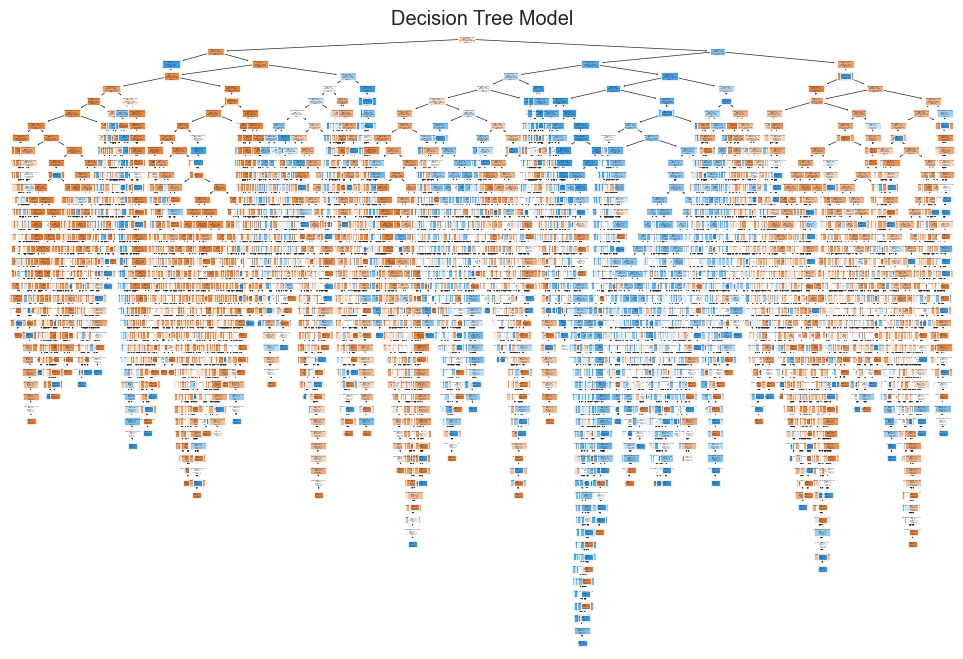

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(model_decisionTree, filled=True, feature_names=["Customer Type", "Type of Travel", "Class", "Flight Distance",
                                             "Inflight wifi service", "Online boarding", "Seat comfort",
                                             "Inflight entertainment", "On-board service", "Leg room service"],
          class_names=["0", "1", "2"])
plt.title("Decision Tree Model")
plt.show()


In [76]:
model_kNeighbors = KNeighborsClassifier(n_neighbors=5)
model_kNeighbors.fit(X_train, y_train.values.ravel())
cv_scores = cross_val_score(model_kNeighbors, X_train, y_train.values.ravel(), cv=5)
y_pred = model_kNeighbors.predict(X_test)

print("K Neighbors")
print("K Neighbors Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

K Neighbors
K Neighbors Accuracy: 0.9355180212694288
Mean Accuracy: 0.9316314761880639
Cross-Validation Scores: [0.93184962 0.92914286 0.93070677 0.93220645 0.93425168]
Confusion Matrix:
 [[11250   463]
 [  877  8191]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     11713
         1.0       0.95      0.90      0.92      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



In [77]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train.values.ravel())
cv_scores = cross_val_score(model_rf, X_train, y_train.values.ravel(), cv=5)
y_pred = model_rf.predict(X_test)

print("Random Forest")
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest
Random Forest Accuracy: 0.9359511091862759
Mean Accuracy: 0.9378631745388495
Cross-Validation Scores: [0.93828571 0.93479699 0.93984962 0.93689846 0.93948508]
Confusion Matrix:
 [[11171   542]
 [  789  8279]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     11713
         1.0       0.94      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



In [78]:
model_poly = PolynomialFeatures(degree=2)
X_poly = model_poly.fit_transform(X_train)
X_test_poly = model_poly.transform(X_test)

model_lr_poly = LogisticRegression(C=0.34488521115218396, penalty='l2', solver='liblinear')
model_lr_poly.fit(X_poly, y_train.values.ravel())
cv_scores = cross_val_score(model_lr_poly, X_train, y_train.values.ravel(), cv=5)

y_pred_lr_poly = model_lr_poly.predict(X_test_poly)

accuracy_lr_poly = accuracy_score(y_test, y_pred_lr_poly)

print("Logistic Regression with Polynomial Features")
print("Logistic Regression with Polynomial Features Accuracy:", accuracy_score(y_test, y_pred_lr_poly))
print("Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_poly))

Logistic Regression with Polynomial Features
Logistic Regression with Polynomial Features Accuracy: 0.9227659881622636
Mean Accuracy: 0.8646464023388596
Cross-Validation Scores: [0.86165414 0.864      0.86538346 0.86724013 0.86495428]
Confusion Matrix:
 [[11059   654]
 [  951  8117]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     11713
         1.0       0.93      0.90      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



In [79]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train.values.ravel())
cv_scores = cross_val_score(model_nb, X_train, y_train.values.ravel(), cv=5)
y_pred = model_nb.predict(X_test)

print("Naive Bayes")
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Accuracy:", cv_scores.mean())
print("Cross-Validation Scores:", cv_scores)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes
Naive Bayes Accuracy: 0.8632404600356095
Mean Accuracy: 0.8635035220389762
Cross-Validation Scores: [0.86207519 0.86129323 0.8638797  0.86543551 0.86483397]
Confusion Matrix:
 [[10508  1205]
 [ 1637  7431]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     11713
         1.0       0.86      0.82      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist_lr = {
    'C': uniform(loc=0.001, scale=10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist_lr, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train, y_train.values.ravel())

print("Best Hyperparameters for Logistic Regression:", random_search_lr.best_params_)

best_model_lr = random_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Best Hyperparameters for Logistic Regression: {'C': np.float64(0.34488521115218396), 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8653577787401954
Confusion Matrix:
 [[10455  1258]
 [ 1540  7528]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     11713
         1.0       0.86      0.83      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



In [ ]:
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist_dt, n_iter=90, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train.values.ravel())

print("Best Hyperparameters for Decision Tree:", random_search_dt.best_params_)

best_model_dt = random_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Best Hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}
Accuracy: 0.9388864828449064
Confusion Matrix:
 [[11283   430]
 [  840  8228]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     11713
         1.0       0.95      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [ ]:
param_dist_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train, y_train.values.ravel())
    
print("Best Hyperparameters for KNN:", random_search_knn.best_params_)

best_model_knn = random_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Best Hyperparameters for KNN: {'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'algorithm': 'auto'}
Accuracy: 0.9366248015013714
Confusion Matrix:
 [[11304   409]
 [  908  8160]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.94     11713
         1.0       0.95      0.90      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [83]:
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None]  
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=100,  
    cv=5,        
    scoring='accuracy',
    random_state=42,
    n_jobs=-1    
)

random_search_rf.fit(X_train, y_train.values.ravel())

print("Best Hyperparameters for Random Forest:", random_search_rf.best_params_)

best_model_rf = random_search_rf.best_estimator_
y_pred = best_model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.9479332082190463
Confusion Matrix:
 [[11335   378]
 [  704  8364]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     11713
         1.0       0.96      0.92      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline tanımı: Polynomial → StandardScaler → LogisticRegression
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, solver='lbfgs'))  # max_iter önemli!
])

param_dist_poly_logreg = {
    'poly__degree': [1, 2, 3],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs', 'liblinear']
}

random_search_poly_logreg = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist_poly_logreg,
    n_iter=30,           
    cv=5,               
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_poly_logreg.fit(X_train, y_train.values.ravel())

print("Best Hyperparameters for Logistic Regression (Polynomial):", random_search_poly_logreg.best_params_)

best_model_poly_logreg = random_search_poly_logreg.best_estimator_
y_pred_poly_logreg = best_model_poly_logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_poly_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_poly_logreg))


Best Hyperparameters for Logistic Regression (Polynomial): {'poly__degree': 3, 'logreg__solver': 'liblinear', 'logreg__penalty': 'l2', 'logreg__C': 10}
Accuracy: 0.9372022520571676
Confusion Matrix:
 [[11171   542]
 [  763  8305]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     11713
         1.0       0.94      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [85]:
param_dist_nb = {
    'var_smoothing': np.logspace(-12, -6, 100)
}

random_search_nb = RandomizedSearchCV(
    GaussianNB(),
    param_distributions=param_dist_nb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search_nb.fit(X_train, y_train.values.ravel())

best_params = random_search_nb.best_params_
print("Best Hyperparameters for Naive Bayes:", best_params)

best_model_nb = random_search_nb.best_estimator_
y_pred_nb = best_model_nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Best Hyperparameters for Naive Bayes: {'var_smoothing': np.float64(1.0722672220103232e-07)}
Accuracy: 0.8632404600356095
Confusion Matrix:
 [[10508  1205]
 [ 1637  7431]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     11713
         1.0       0.86      0.82      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



# Part 9. Validation and Learning Curves


## Logistic Regression Learning Curve & Logistic Regression Validation Curve


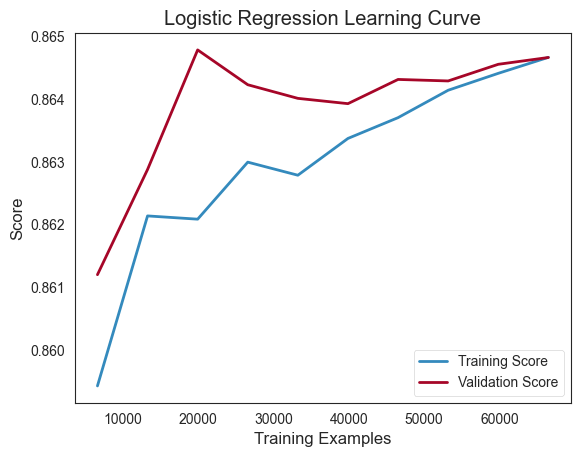

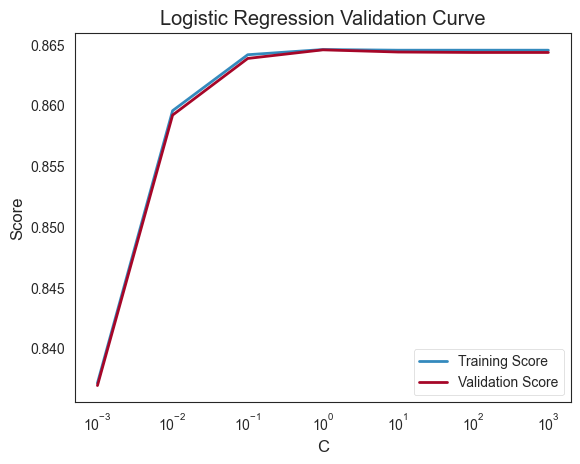

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

best_model_lr_new = LogisticRegression(
    C=0.34488521115218396,
    penalty='l2',
    solver='liblinear',
    random_state=42
)

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_lr_new, X_train, y_train.values.ravel(), train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Validation Curve
param_range = np.logspace(-3, 3, 7)
train_scores, valid_scores = validation_curve(best_model_lr_new, X_train, y_train.values.ravel(), param_name='C', param_range=param_range, cv=5)

plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.semilogx(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Logistic Regression Validation Curve')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

### 1. Graph: Logistic Regression Learning Curve
This graph shows the training and validation scores as the number of training examples increases.

- Training Score (Blue Line): Initially low, the training score improves as the number of examples increases and eventually stabilizes at a high level.

- Validation Score (Red Line): Starts higher than the training score but gradually converges as the training data grows, with both scores reaching similar stable levels.

This graph indicates that the model is not overfitting and that adding more training data improves both the training and validation performance. The closeness between the training and validation scores suggests good generalization ability.
### 2. Graph: Logistic Regression Validation Curve
This graph shows how the training and validation scores change depending on the regularization parameter 𝐶.

- Training Score (Blue Line): With small 𝐶 values (strong regularization), the training score is low; as 𝐶 increases (weaker regularization), the training score rises and then levels off.

- Validation Score (Red Line): Similarly, the validation score improves as 𝐶 increases, then plateaus in an optimal range, showing the model achieves its best balance between underfitting and overfitting.

This graph highlights how the 𝐶 parameter affects model performance: small values may cause underfitting, while very large values risk overfitting. The ideal 𝐶 is where both scores are high and balanced.
### General Evaluation:
- The first graph shows how increasing the training dataset improves the model’s ability to generalize.
- The second graph emphasizes the critical role of selecting the right 𝐶 parameter to achieve optimal performance.

Together, these graphs help us understand the model’s sensitivity to both data size and hyperparameter settings, guiding effective model optimization.


## Decision Tree Learning Curve & Decision Tree Validation Curve


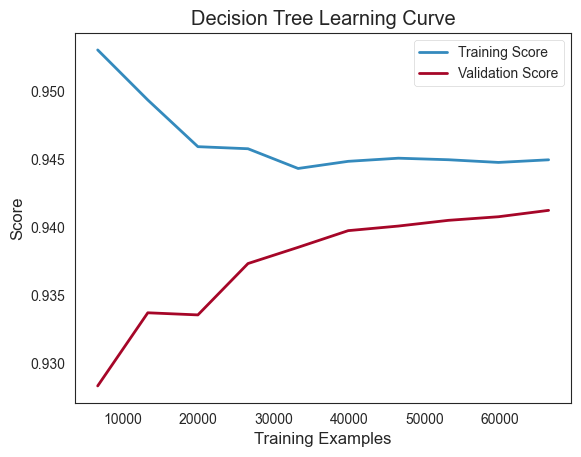

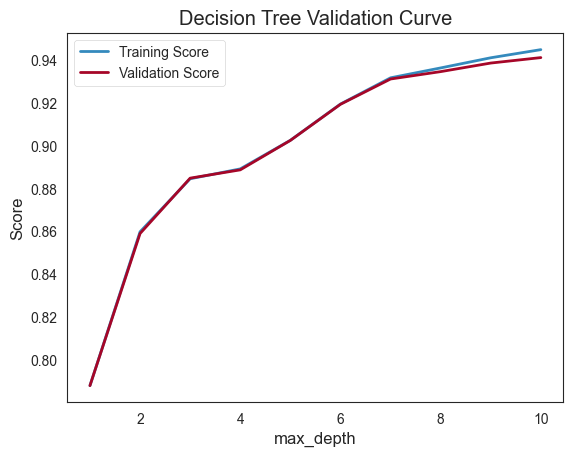

In [ ]:
best_model_dt_new = DecisionTreeClassifier(
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=10,
    criterion='gini',
    random_state=42
)

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_dt_new, X_train, y_train.values.ravel(), train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Validation Curve
param_range = range(1, 11)
train_scores, valid_scores = validation_curve(best_model_dt_new, X_train, y_train.values.ravel(), param_name='max_depth', param_range=param_range, cv=5)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Decision Tree Validation Curve')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


### 1. Graph: Decision Tree Learning Curve
This graph shows the training and validation scores as the number of training examples increases.
- Training Score (Blue Line): Starts very high (close to 1), indicating near-perfect fit on small datasets, but gradually decreases as more data is added, stabilizing at a slightly lower level.

- Validation Score (Red Line): Starts lower but steadily increases as the number of examples grows, eventually stabilizing closer to the training score, though still with a gap.

This suggests that initially, the model overfits the small training set, but adding more data improves generalization. The persistent gap between the training and validation scores indicates that while the model improves, there’s still some overfitting.
### 2. Graph: Decision Tree Validation Curve
This graph shows the training and validation scores depending on the max_depth hyperparameter.

- Training Score (Blue Line): Increases steadily with greater max_depth, as the tree becomes more flexible and better fits the training data.

- Validation Score (Red Line): Also improves with greater max_depth, reaching an optimal plateau around depth 8–10, where it closely tracks the training score.

This graph highlights that increasing tree depth improves model capacity and reduces bias, but very deep trees can risk overfitting. Here, the balance seems good up to depth 10, as validation performance remains high.
### General Evaluation:
- The learning curve shows that more data helps improve the model’s generalization but that overfitting risk remains.

- The validation curve shows how increasing model complexity (via max_depth) affects performance, helping identify the optimal depth for balancing bias and variance.

Together, these plots guide fine-tuning the Decision Tree’s complexity and understanding its behavior as data size increases.

## KNN Learning Curve & KNN Validation Curve

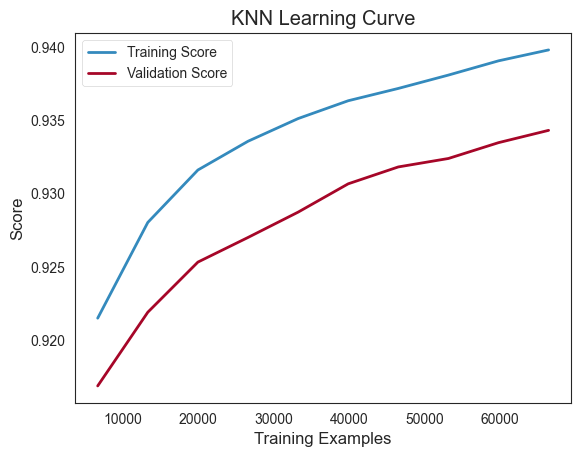

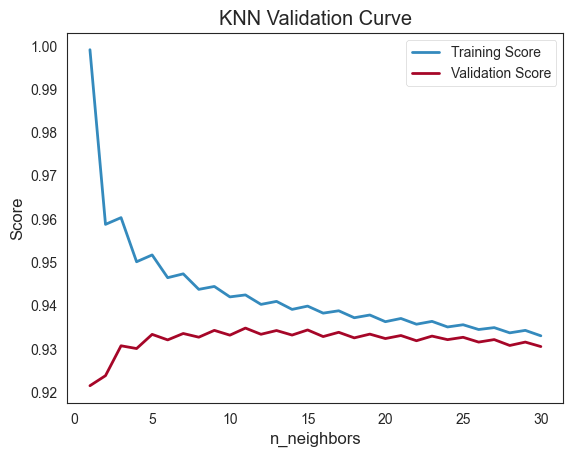

In [ ]:
best_model_knn_new = KNeighborsClassifier(
    weights='uniform',
    p=1,
    n_neighbors=15,
    algorithm='auto'
)

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_knn_new, X_train, y_train.values.ravel(), train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('KNN Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Validation Curve
param_range = range(1, 31)
train_scores, valid_scores = validation_curve(best_model_knn_new, X_train, y_train.values.ravel(), param_name='n_neighbors', param_range=param_range, cv=5)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('KNN Validation Curve')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


### 1. Graph: KNN Learning Curve

The blue line shows the model’s performance on the training data.
Initially, the training score is quite high, around 0.940, indicating the model fits the training data well. As the number of training examples increases, the training score slightly decreases and stabilizes just below 0.940, reflecting that the model generalizes better and no longer overfits as much.

The red line shows the model’s performance on the validation data.
As the number of training examples increases, the validation score steadily rises, reaching around 0.935. This indicates that providing the model with more training data improves its ability to generalize and enhances its performance on unseen data.

- The training score starts high and then slightly decreases, while the validation score consistently increases as data grows.

- This suggests the model benefits from more data, achieving better generalization and reducing overfitting.

- The narrowing gap between training and validation scores signals a healthier balance between fit and generalization, leading to stronger validation performance.

### 2. Graph: KNN Validation Curve

The blue line shows training performance across different numbers of neighbors (n_neighbors).
When n_neighbors is small (especially 1), the training score is near 1.0, indicating overfitting, as the model memorizes the training data. As n_neighbors increases, the training score drops rapidly and stabilizes around 0.93.

The red line shows validation performance across different neighbor counts.
Initially, with very few neighbors, the validation score is lower (around 0.92), indicating poor generalization. As n_neighbors increases, the validation score improves slightly, peaking and then flattening around 0.925.

- Small neighbor counts lead to overfitting with high training scores but poor validation performance.

- As the number of neighbors increases, the model generalizes better, reducing overfitting and stabilizing validation performance.

- However, beyond about 20 neighbors, additional increases bring little benefit, suggesting the optimal range lies between 10 and 20 neighbors.

These graphs provide key insights into how KNN’s performance depends on data size and the n_neighbors hyperparameter, guiding effective model tuning.

## Random Forest Learning Curve & Random Forest Validation Curve

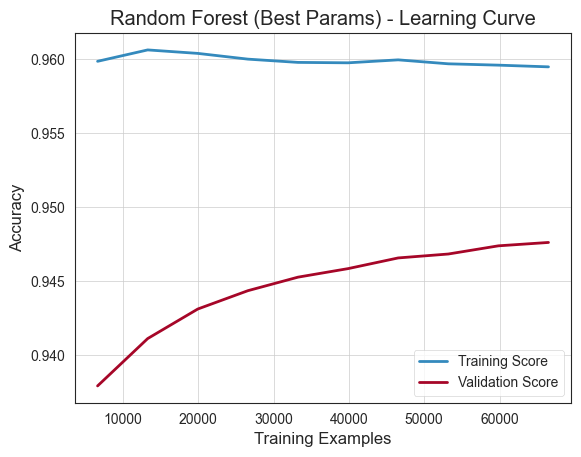

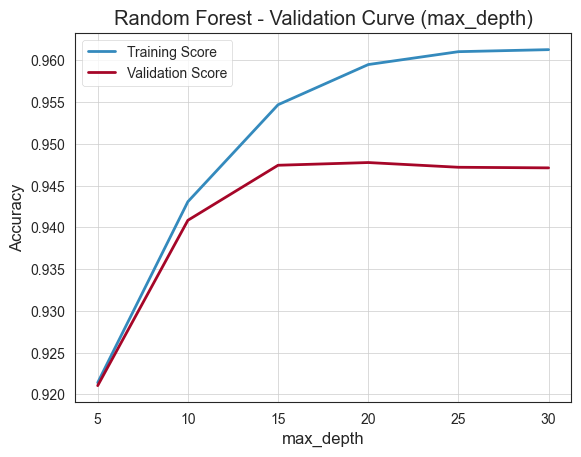

In [ ]:
best_model_rf_new = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    random_state=42
)
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_model_rf_new,
    X_train,
    y_train.values.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Random Forest (Best Params) - Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

#  Validation Curve
param_range = [5, 10, 15, 20, 25, 30]

train_scores, valid_scores = validation_curve(
    best_model_rf_new,
    X_train,
    y_train.values.ravel(),
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Random Forest - Validation Curve (max_depth)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


### 1. Graph: Random Forest Learning Curve
The blue line shows the model’s accuracy on the training data.

- The training score starts very high (~0.96) and remains consistently high as the number of training examples increases, indicating the model fits the training data very well and maintains strong in-sample performance.

The red line shows the model’s accuracy on the validation data.

- The validation score starts lower (~0.938) but steadily improves as the number of training examples increases, eventually reaching around 0.948.

This indicates that while the model already performs very well on training data, providing more training examples improves its generalization ability, enhancing validation performance. The gap between training and validation scores narrows slightly, suggesting reduced overfitting.
### 2. Graph: Random Forest Validation Curve
The blue line shows training accuracy as the max_depth hyperparameter increases.

- As max_depth increases, the training score rises sharply, eventually reaching near-perfect accuracy (~0.96), showing that deeper trees can fit the training data almost perfectly.

The red line shows validation accuracy as max_depth changes.

- Initially, as max_depth increases, validation performance improves and stabilizes around ~0.946, but further increasing the depth provides little additional benefit and may even slightly reduce validation performance due to overfitting.

This indicates that while deeper trees improve training fit, they can overfit, so the optimal depth is around 15–20, where validation accuracy peaks.
### General Evaluation
- The learning curve shows that adding more data improves validation performance without compromising training accuracy, strengthening generalization.

- The validation curve highlights that controlling model complexity (via max_depth) is essential to avoid overfitting, with the best performance achieved at an intermediate depth.

Together, these insights help guide effective tuning of Random Forest models.

## Logistic Regression with Polynomial Features Learning Curve & Logistic Regression with Polynomial Features Validation Curve

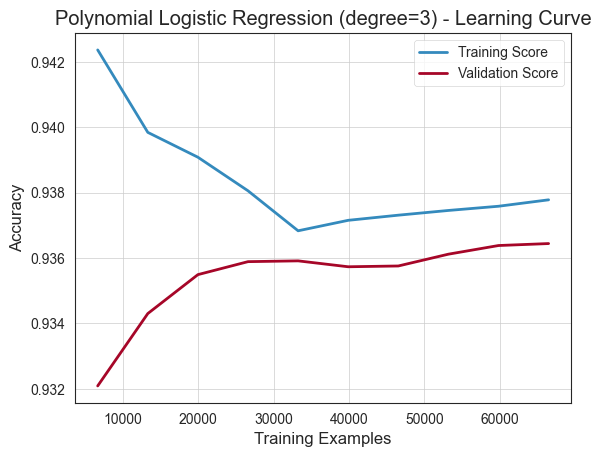

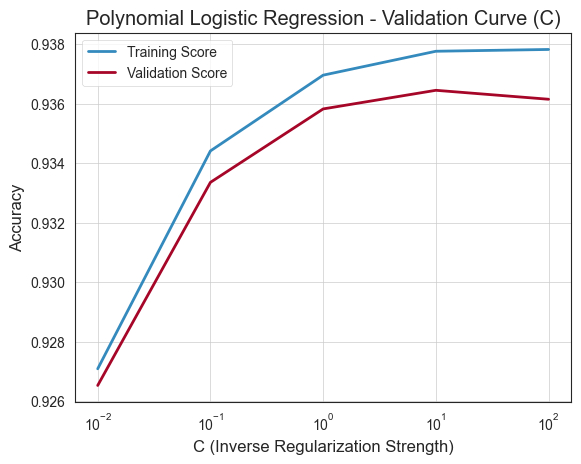

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

best_model_lr_poly_fixed = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        penalty='l2',
        C=10,
        random_state=42
    ))
])

#  Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_model_lr_poly_fixed,
    X_train,
    y_train.values.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Polynomial Logistic Regression (degree=3) - Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

#  Validation Curve
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, valid_scores = validation_curve(
    best_model_lr_poly_fixed,
    X_train,
    y_train.values.ravel(),
    param_name='logreg__C',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Polynomial Logistic Regression - Validation Curve (C)')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(loc='best')
plt.grid()
plt.show()


### 1. Graph: Polynomial Logistic Regression Learning Curve
The blue line shows training accuracy.

- It starts high (~0.942), indicating the model fits the training data well initially, but as the number of training examples increases, the training score gradually decreases and stabilizes around ~0.938. This shows that the model becomes less overfitted and generalizes better with more data.

The red line shows validation accuracy.

- It starts lower (~0.932) but steadily increases as more data is provided, eventually stabilizing around ~0.936.

Overall, the gap between training and validation scores narrows as data increases, indicating improved generalization and reduced overfitting.
### 2. Graph: Polynomial Logistic Regression Validation Curve
The blue line shows training accuracy as the regularization parameter 𝐶 changes.

- With small 𝐶 values (strong regularization), the training score is low. As 𝐶 increases (weaker regularization), the training score improves and plateaus around ~0.938.

The red line shows validation accuracy across the same range.

- Validation accuracy improves as 𝐶 increases, peaking around 𝐶=10, but slightly drops or flattens beyond that, suggesting overfitting risks at very large 𝐶 values.

This highlights that optimal performance is achieved when 𝐶 balances underfitting (too small) and overfitting (too large), with the best range here around 𝐶=1 to 𝐶=10.
### Overall Evaluation
- The learning curve shows that more training data improves validation performance and reduces overfitting.

- The validation curve emphasizes the importance of tuning 𝐶 to achieve the best balance between bias and variance.

Together, these plots help optimize the Polynomial Logistic Regression model for best generalization.

## Naive Bayes Learning Curve & Naive Bayes Validation Curve

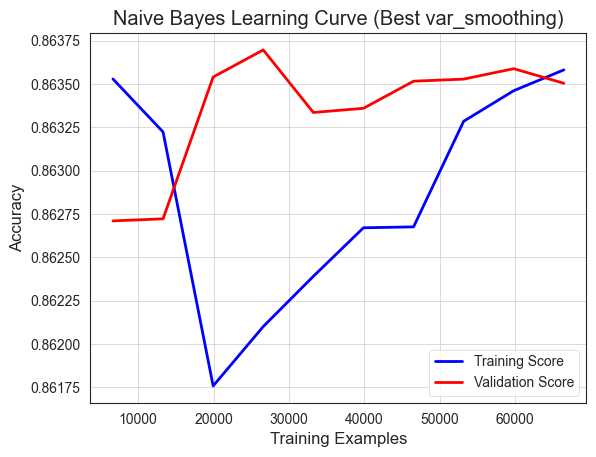

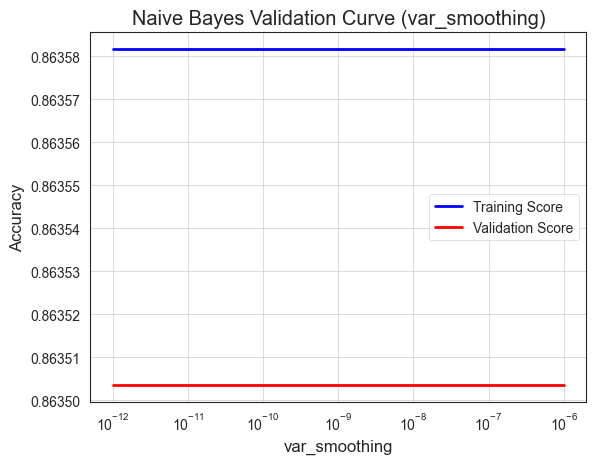

In [ ]:
best_model_nb_new = GaussianNB(
    var_smoothing=1.0722672220103232e-07
)

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_model_nb_new,
    X_train,
    y_train.values.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score', color='red')
plt.title('Naive Bayes Learning Curve (Best var_smoothing)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# Validation Curve için farklı var_smoothing değerleri (log-scale)
param_range = np.logspace(-12, -6, 20)

train_scores, valid_scores = validation_curve(
    best_model_nb_new,
    X_train,
    y_train.values.ravel(),
    param_name='var_smoothing',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.semilogx(param_range, np.mean(valid_scores, axis=1), label='Validation Score', color='red')
plt.title('Naive Bayes Validation Curve (var_smoothing)')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


### 1. Graph: Naive Bayes Learning Curve
The blue line shows training accuracy.

- The training score starts slightly high (~0.8634), dips significantly as more training examples are added, and then gradually recovers, stabilizing near the initial value. This fluctuation indicates that Naive Bayes, being a simple model, is relatively stable but can show variance due to data characteristics.

The red line shows validation accuracy.

- The validation score starts slightly lower (~0.8627), quickly rises above the training score, and remains consistently stable with minor improvements as more data is added.

Overall, the small gap and steady performance suggest that the Naive Bayes model generalizes reasonably well, though its capacity to improve further with more data is limited.
### 2. Graph: Naive Bayes Validation Curve
Both the training and validation lines are flat across the entire range of the var_smoothing hyperparameter.

- This indicates that changes to var_smoothing have little to no effect on model performance within the tested range; the accuracy remains fixed at ~0.8634 (training) and ~0.8635 (validation).

This shows that the Naive Bayes model is quite insensitive to the var_smoothing parameter in this context, likely due to the data being well-separated or the parameter having minimal influence.
### Overall Evaluation
- The learning curve suggests that the Naive Bayes model achieves stable but limited improvements with more data.

- The validation curve shows that var_smoothing tuning does not significantly affect performance, indicating the model’s simplicity and robustness.

Together, these plots reveal that while Naive Bayes offers solid baseline performance, its capacity for fine-tuning and major gains is limited compared to more complex models.